First 5 rows of the dataset:
  LOCATION               Country  Year  Business_enterprise    Government  \
0      ALB               Albania  2007         2.930940e+02  1.506861e+04   
1      ALB               Albania  2008         1.218547e+03  3.020112e+04   
2      ARE  United Arab Emirates  2014         3.157091e+06  1.092839e+06   
3      ARG             Argentina  1996                  NaN           NaN   
4      ARG             Argentina  1997         4.790537e+05  1.153081e+06   

   Higher_Education  Private_non-profit  Rest_of_the_world  \
0        1282.00667                 NaN         2273.15668   
1        3202.33312                 NaN         2753.51278   
2               NaN                 NaN                NaN   
3               NaN                 NaN                NaN   
4       29224.56816         38536.31782        60454.74394   

   Not_specified_source  Basic_research  Applied_research  \
0                   NaN             NaN               NaN   
1            

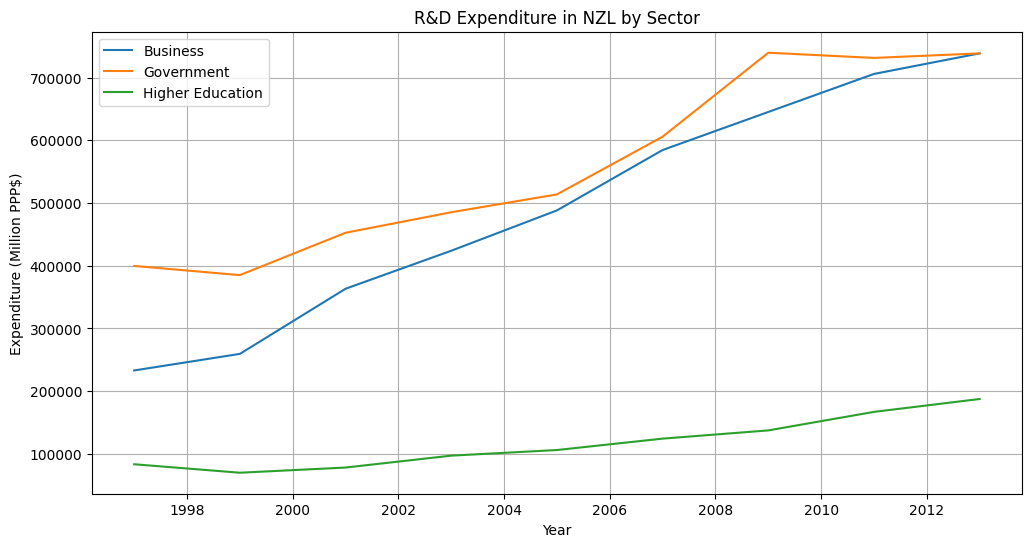


Correlation matrix between funding sources:
                     Business_enterprise  Government  Higher_Education
Business_enterprise             1.000000    0.974566          0.947401
Government                      0.974566    1.000000          0.941686
Higher_Education                0.947401    0.941686          1.000000


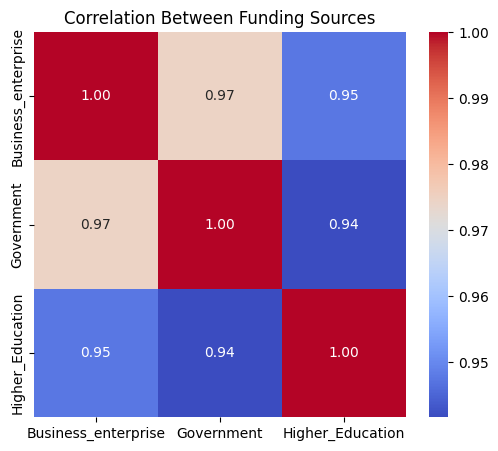

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://datahub.io/core/expenditure-on-research-and-development/r/expenditure.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('%','pct').str.replace('(','').str.replace(')','')
df.rename(columns={'TIME': 'Year'}, inplace=True)

numeric_cols = df.columns.difference(['LOCATION', 'Country', 'Year'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary statistics for the dataset:")
print(df.describe(include='all'))

df = df.dropna(subset=['Business_enterprise', 'Government', 'Higher_Education'])

country_code = 'NZL'
df_country = df[df.LOCATION == country_code]

print(f"\nSummary statistics for {country_code}:")
print(df_country.describe()[['Business_enterprise', 'Government', 'Higher_Education']])

plt.figure(figsize=(12,6))
sns.lineplot(data=df_country, x='Year', y='Business_enterprise', label='Business')
sns.lineplot(data=df_country, x='Year', y='Government', label='Government')
sns.lineplot(data=df_country, x='Year', y='Higher_Education', label='Higher Education')
plt.title(f"R&D Expenditure in {country_code} by Sector")
plt.ylabel("Expenditure (Million PPP$)")
plt.grid(True)
plt.show()

# Correlation matrix and heatmap
corr = df_country[['Business_enterprise', 'Government', 'Higher_Education']].corr()
print("\nCorrelation matrix between funding sources:")
print(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Funding Sources")
plt.show()
